# COGS 108 - Project Proposal

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
from pandas.plotting import scatter_matrix

C:\Users\siq00\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID. Add lines as needed for your group size, and make sure each ID is listed on a separate line. 

- A13628601
- A14818302
- A14419227
- A14534893
- A13370971
- A92008073

## Research Question


### Is the revenue of popular movies in recent ten years propotional to rating on IMDB and MovieLens? How would other related factors affect the prediction of the revenue?

### Hypothesis

What is your main hypothesis and predictions? (2-3 sentences)

The revenue of recent popular movies is propotional to rating on IMDB and MovieLens. The factors such as genres and directors also affect correlation between revenue and rating, thus a multiple regression would make a good prediction for revenue.

### Dataset(s)


- Dataset Name: IMDB data from 2006 to 2016
- Link to the dataset: https://www.kaggle.com/PromptCloudHQ/imdb-data/data
- Number of observations: 1000

Describtion of dataset: It is a dataset of 1000 most popular movies on IMDB, with title, genre, description, director, actors, year, runtime, rating, votes, revenue, and metascore. 


- Dataset Name: MovieLens Latest Dataset
- Link to the dataset: https://grouplens.org/datasets/movielens/latest/
- Number of observations: 700

Describtion of dataset: a small dataset of ratings from users in MovieLens, including 100000 ratings and 1300 tag applications applied to 9000 movies by 700 users



In [61]:
IMDBdata=pd.read_csv('IMDB-Movie-Data.csv')

In [62]:
IMDBdata=IMDBdata.dropna(axis=0, how='any')


In [63]:
del IMDBdata['Rank']

In [64]:
del IMDBdata["Actors"]

In [65]:
del IMDBdata["Description"]

In [66]:
del IMDBdata["Director"]

In [67]:
del IMDBdata["Runtime (Minutes)"]

In [68]:
IMDBdata=IMDBdata.reset_index(drop=True)

In [69]:
#The unit of time length is minute.
#The unit of Revenue is Million.
IMDBdata.columns = ["Title", "Genre", "Year", "Rating", "Votes",
              "Revenue", "Metascore"]

In [70]:
IMDBdata

,Title,Genre,Year,Rating,Votes,Revenue,Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",2014,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",2012,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",2016,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family",2016,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",2016,6.2,393727,325.02,40.0
5,The Great Wall,"Action,Adventure,Fantasy",2016,6.1,56036,45.13,42.0
6,La La Land,"Comedy,Drama,Music",2016,8.3,258682,151.06,93.0
7,The Lost City of Z,"Action,Adventure,Biography",2016,7.1,7188,8.01,78.0
8,Passengers,"Adventure,Drama,Romance",2016,7.0,192177,100.01,41.0
9,Fantastic Beasts and Where to Find Them,"Adventure,Family,Fantasy",2016,7.5,232072,234.02,66.0


In [71]:
f= "Revenue~Rating"
[outcome_1,predictors_1]=patsy.dmatrices(f,IMDBdata)
mod_1=sm.OLS(outcome_1,predictors_1)
res_1=mod_1.fit()

In [72]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     41.35
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           2.13e-10
Time:                        18:05:09   Log-Likelihood:                -5064.5
No. Observations:                 838   AIC:                         1.013e+04
Df Residuals:                     836   BIC:                         1.014e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -91.6012     27.621     -3.316      0.0

In [89]:
f= "Revenue~Rating+Metascore"
[outcome_2,predictors_2]=patsy.dmatrices(f,IMDBdata)
mod_2=sm.OLS(outcome_2,predictors_2)
res_2=mod_2.fit()

In [90]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     20.66
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           1.74e-09
Time:                        21:36:49   Log-Likelihood:                -5064.5
No. Observations:                 838   AIC:                         1.014e+04
Df Residuals:                     835   BIC:                         1.015e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -92.7940     28.814     -3.220      0.0

In [91]:
f= "Revenue~Rating+Metascore+Votes"
[outcome_3,predictors_3]=patsy.dmatrices(f,IMDBdata)
mod_3=sm.OLS(outcome_3,predictors_3)
res_3=mod_3.fit()

In [92]:
print(res_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     203.7
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           4.10e-99
Time:                        21:36:53   Log-Likelihood:                -4854.4
No. Observations:                 838   AIC:                             9717.
Df Residuals:                     834   BIC:                             9736.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    136.7345     24.504      5.580      0.0

Text(0,0.5,'Revenue(Million)')

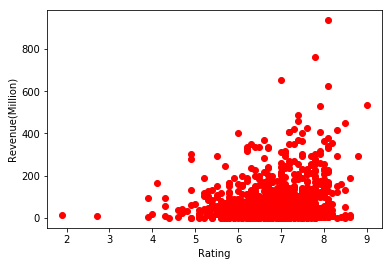

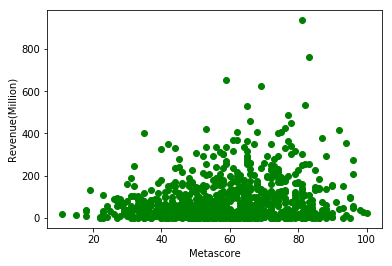

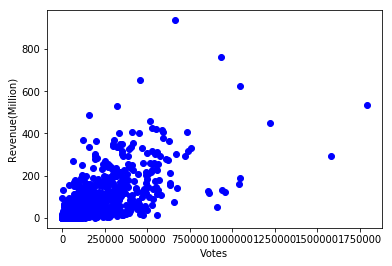

In [82]:
plt.figure(1)
x=IMDBdata['Rating']
y=IMDBdata['Revenue']
plt.plot(x,y,'ro')
plt.xlabel('Rating')
plt.ylabel('Revenue(Million)')

plt.figure(2)
x=IMDBdata['Metascore']
y=IMDBdata['Revenue']
plt.plot(x,y,'go')
plt.xlabel('Metascore')
plt.ylabel('Revenue(Million)')

plt.figure(3)
x=IMDBdata['Votes']
y=IMDBdata['Revenue']
plt.plot(x,y,'bo')
plt.xlabel('Votes')
plt.ylabel('Revenue(Million)')

Text(0.5,1,'Votes Distribution')

<Figure size 432x288 with 0 Axes>

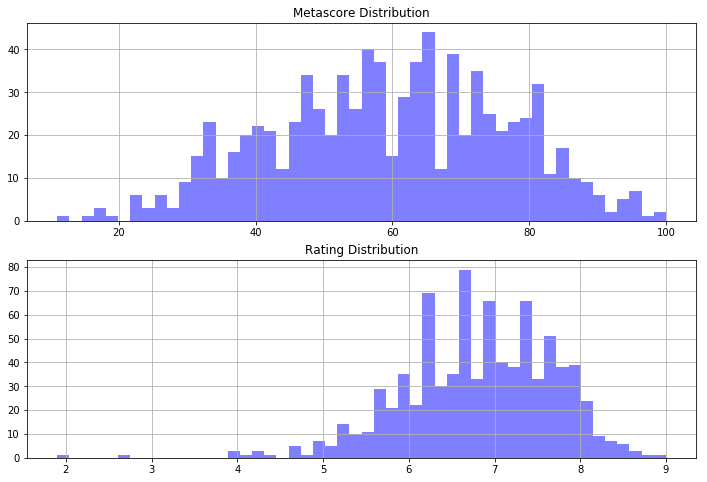

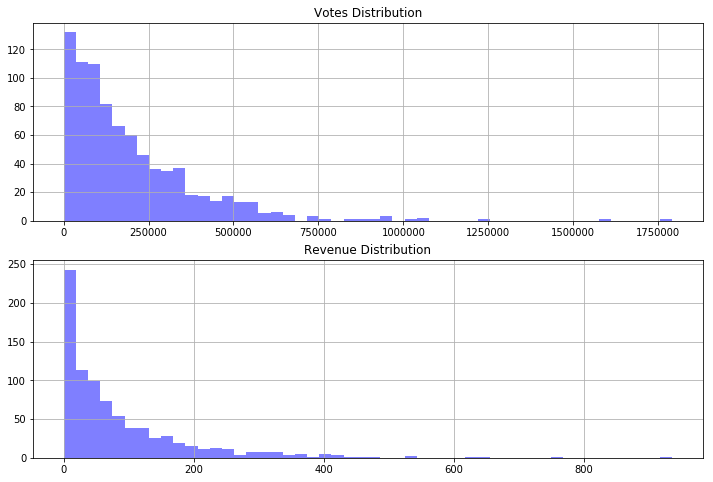

In [103]:
plt.figure(1)
plt.figure(figsize=(12,8))
plt.subplot(211)
IMDBdata.Metascore.hist(color='b', alpha=0.5, bins=50)
plt.title("Metascore Distribution")
plt.subplot(212)
IMDBdata.Rating.hist(color='b', alpha=0.5, bins=50)
plt.title("Rating Distribution")
plt.figure(2)
plt.figure(figsize=(12,8))
plt.subplot(212)
IMDBdata.Revenue.hist(color='b', alpha=0.5, bins=50)
plt.title("Revenue Distribution")
plt.subplot(211)
IMDBdata.Votes.hist(color='b', alpha=0.5, bins=50)
plt.title("Votes Distribution")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BCE2AFDC88>,
      dtype=object)

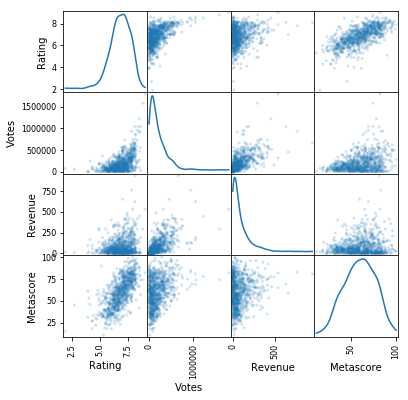

In [112]:
from pandas.plotting import scatter_matrix

df=IMDBdata.copy()
del df["Title"]
del df['Genre']
del df['Year']
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')


### Background and Prior Work

Why is this question of interest, what background information led you to your hypothesis, and why is this important?

Find some relevant prior work, and reference those sources. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project. 

References can be research publications, but they need not be. Blogs, github repositories, company websites, etc., are all viable references if they are relevant to your project.

(2-3 paragraphs, including at least 2 references)


Watching movie is a major entertainment for modern people. Movies provide people with amusement and excitement widely. As the movie industry developing swiftly, our group wonder what elements may influence the box office of movies. To general understanding, the movies receives good reviews also have high revenues.
To study this issue and further explore the relationship between the revenue and rating of movies, we go through the dataset of IMDB, which includes 1,000 most popular movies in the last 10 years, and the MovieLens dataset with 700 records. The data fields included are: Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, meta score. We begin to have a general sense that revenue is proportional to ratings most times. However, there are other factors involved in the linear proportion between revenue and rating. For instance, some genres such as horror movies may be produced for minority. Those movies can receive good reviews but unable to be a huge hit. As we further analyze the dataset, we may find other factors that influence the reviews and box office of movies.


References (include links):
- 1)Baron, C. (2006). Dinner and a Movie [Abstract]. Food, Culture & Society, 9(1), 93-117. doi:10.2752
 link: http://www.tandfonline.com/doi/abs/10.2752/155280106778055190
- 2)Baker-harvey, H., Lin, T., & Meka, P. (2017, July 14). FinalProjects/COGS108-Sp17-PG034. 
 link: https://github.com/COGS108/FinalProjects/blob/master/COGS108-Sp17-PG034.ipynb

### Proposed Methods

What methods will you use to analyze your data?

- How 'clean' is the data? To the extent that it requires cleaning, how will you do so?
- How will you analyze the data? Be as specific as you can. Briefly mention any pre-processing steps that are required for your methods (for example, checking data distributions and performing any transformations that may be required). Include a brief outline of how you will apply your chosen method(s). 
- What do you plan to report? Briefly mention any key visualizations you plan to create, and/or the kind of results you will be able to report that address your question (this could be, for example, the outcome of some statistical test(s), prediction error on a model, a model fit parameter, etc.).
- Include a list of packages you expect to use for you project. If you plan to use packages we have not used in class, add a very brief description about them (a few words is sufficient). 

*Fill in your proposed methods information here:*

*Data Cleaning (2-3 sentences)* and *Data Analysis (1-2 paragraphs)*

We would like to especially concentrate on the correlation among the genre, director and revenue. Hence, we will drop other columns from the dataset we find and build two table to contrast the difference between two different sources which introduce same sort of data to ensure the curation of statistics. 
Besides, we will discard some outliers based on some standards. For instance, some movies may only have hundreds of evaluations which are not enough to reflect public views about the movies. Therefore, we will try to visualize the dataset in multiple ways to check if there are any kinds of outliers and deal with them correspondingly. After that, we will merge these two table into one for further data prediction.
Next, we will build a model based on the data we have collected in the table so that we can deduct a conclusion according to the model.

*What to report (2-3 sentences)*

The data about whether there exists correlation between revenue and rating of movies generally. Moreover, we may show other graphs indicating potential factors mentioned above which may have influences on rating. Finally, we will build a model to analyze whether a movie will be "succeed" based on its attributes.

Packages we plan to use:
- a pandas
- b numpy
- c BeautifulSoup
- d Bokeh (a interactive plotting lib with good looking)

### Ethics and Privacy

Briefly acknowledge and address any potential issues of ethics and privacy for the proposed project. In particular:
- Do you have permission to use this data, for this purpose?
- Are there privacy concerns regarding your datasets that you need to deal with, and/or terms of use that you need to comply with?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?) 
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle any issues you identify?

(1-2 paragraphs)

The first dataset is from open-accessing website Kaggle and collected from public data provider(movie review websites). The authors of the second dataset permit the use of the dataset for any research purpose with certain conditions, which we would not violate. Moreover, the datasets we use contain no personal information. Also there is no other ethics concern.

However, since the data were collected from certain websites, it is possible that the results only reflect the views of the users from the websites, which could be biased in terms of representing general public ideas of the movies. Using dataset from single source of user group might be unappropriate to judge the reputation of the movies. To resolve the potential bias, we try to pull data from two major movie review websites, IMDB and MovieLens, in order to increase the diversity of user group. Although the user group of a major movie review website is large enough to reduce biases from individual differences, using data from two websites can still improve the diversity of the user group.


### Discussion

Discuss your project, looking forward to what your results might mean, how they fit it in with what is already known, and what problems you may encounter. 

In particular:
- If your analyses and hypotheses are correct, what will be the contribution of this project to the topic domain? 
- Alternatively, what will you do if you methods don't work and/or your hypotheses are wrong? 
- What are the potential pitfalls and potential confounds of your data and/or methods that may cause problems, and/or influence your interpretations?

(2-3 paragraphs)

After our research and analysis on our datasets, if we find that the result matches our hypothesis, which means our hypothesis is correct, we will be able to provide a verification that ratings on films can give reliable reflections on economic values of films. Such verification can offer valuable assistance to guidelines on film industry about how to create a balance between film quality,which is reflected by ratings, and economic values, which can be shown by revenue.

If our methods or hypothesis get wrong, we will analyze potential sources of errors that can place other angles on our topics, which can improve our research and make the conclusion of our project more precise and constructive.

Firstly, there might be possible factors, such as popularity of certain actor,that we can not take into consideration, which can influence the correlation among varibales we study. Secondly, the fidelity of data we collect from databases can be reduced by users personal preferences and bias.